## Load Necessary Library 

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import joblib
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Read Data

In [28]:
df = pd.read_csv("Data_for_UCI_named.csv")

## Data overview

In [29]:
df.shape

(10000, 14)

In [30]:
df.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [32]:
df.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

## Label value check

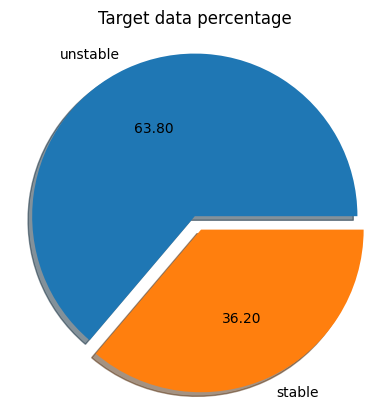

In [33]:
plt.pie(df.stabf.value_counts().values,labels=df.stabf.value_counts().index.tolist(),
        shadow=True,
        radius=1.1,
        autopct="%0.2f",
        explode=[0,0.1])
plt.title("Target data percentage")


plt.savefig('media/1 (preprocessing)(Target ddata percentage).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show() 

## Text to Number

In [34]:
l_e = LabelEncoder().fit(df.stabf)
df['stabf'] = l_e.transform(df.stabf)

joblib.dump(l_e, 'pipeline/LabelEncoder_stabf.job')

['pipeline/LabelEncoder_stabf.job']

## Relation

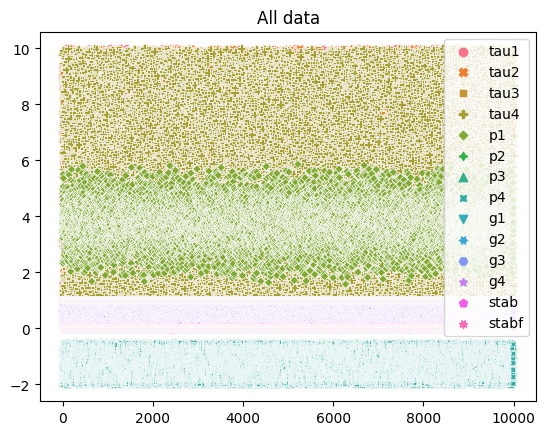

In [35]:
sns.scatterplot(df)
plt.title("All data")
plt.savefig('media/2 (preprocessing)(All data).png',
            bbox_inches ="tight",
            transparent = True
            ) 
plt.show() 

In [36]:
df.corr()

tau1      tau2      tau3      tau4        p1        p2        p3  \
tau1   1.000000  0.015586 -0.005970 -0.017265  0.027183 -0.015485 -0.015924   
tau2   0.015586  1.000000  0.014273 -0.001965 -0.004769  0.006573  0.007673   
tau3  -0.005970  0.014273  1.000000  0.004354  0.016953 -0.003134 -0.008780   
tau4  -0.017265 -0.001965  0.004354  1.000000 -0.003173  0.010553  0.006169   
p1     0.027183 -0.004769  0.016953 -0.003173  1.000000 -0.573157 -0.584554   
p2    -0.015485  0.006573 -0.003134  0.010553 -0.573157  1.000000  0.002388   
p3    -0.015924  0.007673 -0.008780  0.006169 -0.584554  0.002388  1.000000   
p4    -0.015807 -0.005963 -0.017531 -0.011211 -0.579239 -0.006844  0.012953   
g1     0.010521 -0.001742 -0.011605 -0.004149  0.000721  0.015603 -0.003219   
g2     0.015350  0.015383  0.007671  0.008431  0.015405 -0.018032 -0.011575   
g3    -0.001279  0.016508  0.014702  0.003260  0.001069  0.007555 -0.005897   
g4     0.005494 -0.011764 -0.011497 -0.000491 -0.015451  0.019817 -0.010485   
stab   0.275761  0.290975  0.280700  0.278576  0.010278  0.006255 -0.003321   
stabf  0.234898  0.246280  0.237492  0.239375  0.009938  0.006173 -0.000649   

             p4        g1        g2        g3        g4      stab     stabf  
tau1  -0.015807  0.010521  0.015350 -0.001279  0.005494  0.275761  0.234898  
tau2  -0.005963 -0.001742  0.015383  0.016508 -0.011764  0.290975  0.246280  
tau3  -0.017531 -0.011605  0.007671  0.014702 -0.011497  0.280700  0.237492  
tau4  -0.011211 -0.004149  0.008431  0.003260 -0.000491  0.278576  0.239375  
p1    -0.579239  0.000721  0.015405  0.001069 -0.015451  0.010278  0.009938  
p2    -0.006844  0.015603 -0.018032  0.007555  0.019817  0.006255  0.006173  
p3     0.012953 -0.003219 -0.011575 -0.005897 -0.010485 -0.003321 -0.000649  
p4     1.000000 -0.013636  0.002850 -0.003515  0.017505 -0.020786 -0.022785  
g1    -0.013636  1.000000  0.007559 -0.005836  0.012431  0.282774  0.197664  
g2     0.002850  0.007559  1.000000 -0.012809 -0.014909  0.293601  0.217341  
g3    -0.003515 -0.005836 -0.012809  1.000000  0.006900  0.308235  0.231774  
g4     0.017505  0.012431 -0.014909  0.006900  1.000000  0.279214  0.204931  
stab  -0.020786  0.282774  0.293601  0.308235  0.279214  1.000000  0.826959  
stabf -0.022785  0.197664  0.217341  0.231774  0.204931  0.826959  1.000000

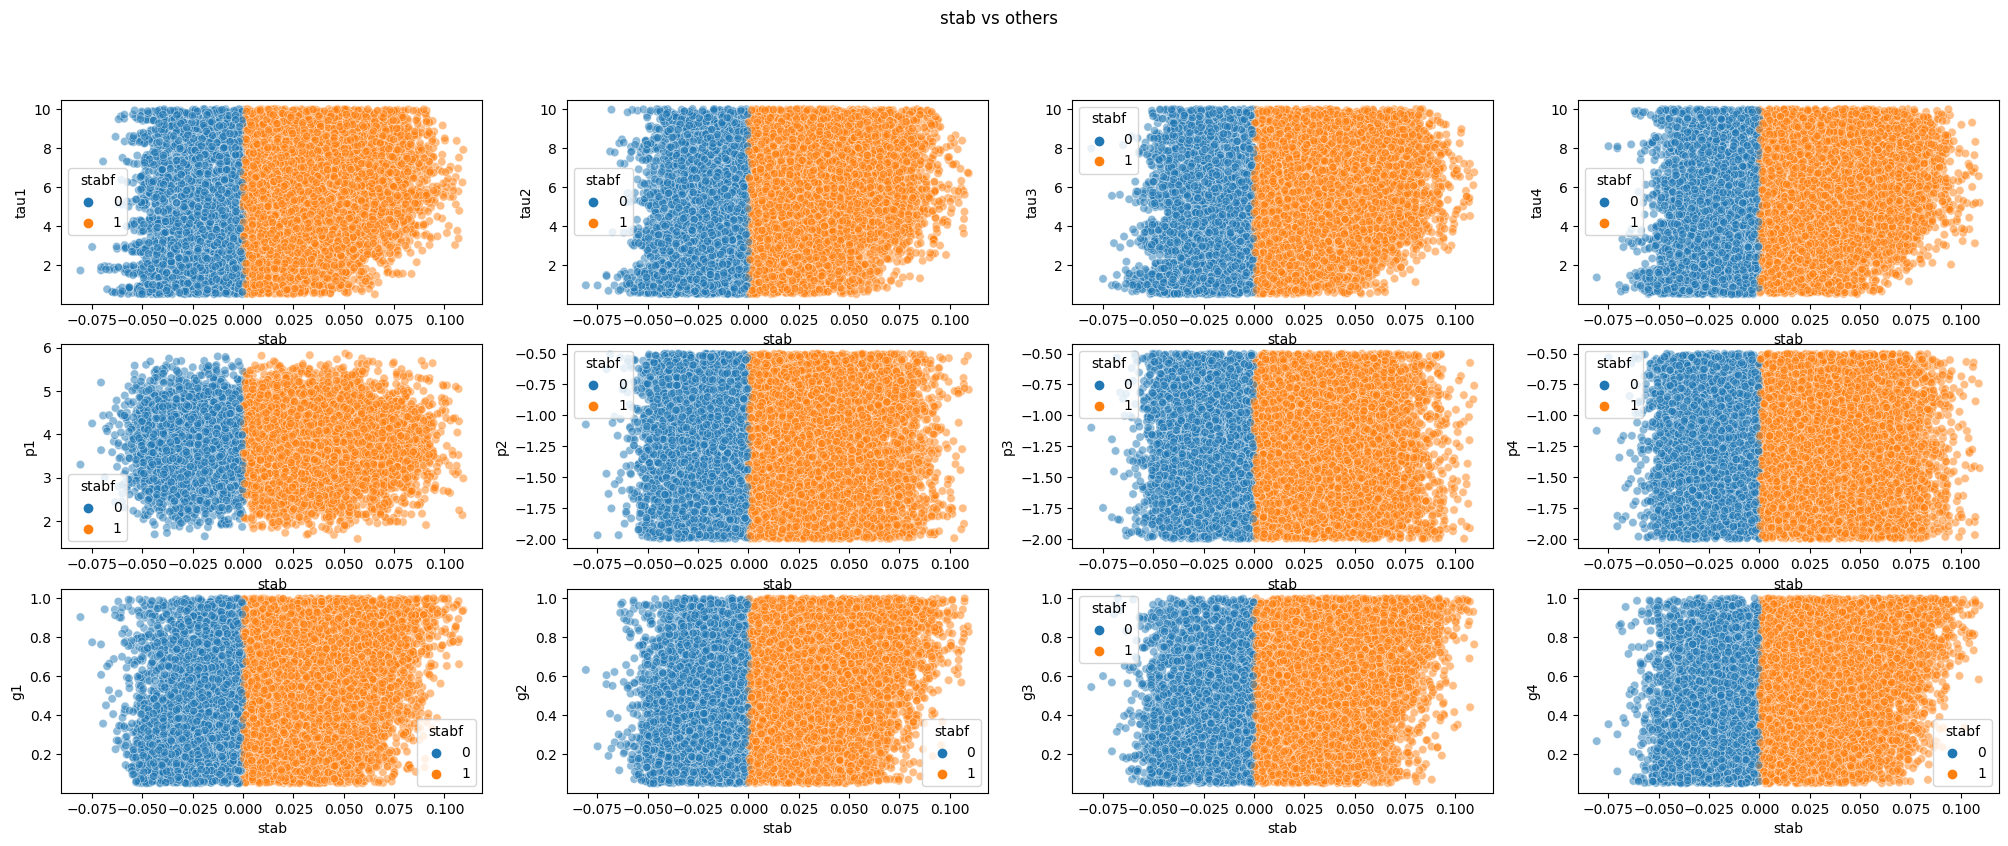

In [37]:
plt.figure(figsize=(25,9))

for i,j in enumerate(df.columns.to_list()[:-2]):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=df['stab'],y=df[j] ,hue=df['stabf'],alpha=0.5)

plt.suptitle("stab vs others")


plt.savefig('media/3 (preprocessing) (stab vs others).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show() 

In [38]:
#stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)
# so we have to remove it
df.drop(["stab"],axis=1,inplace=True)

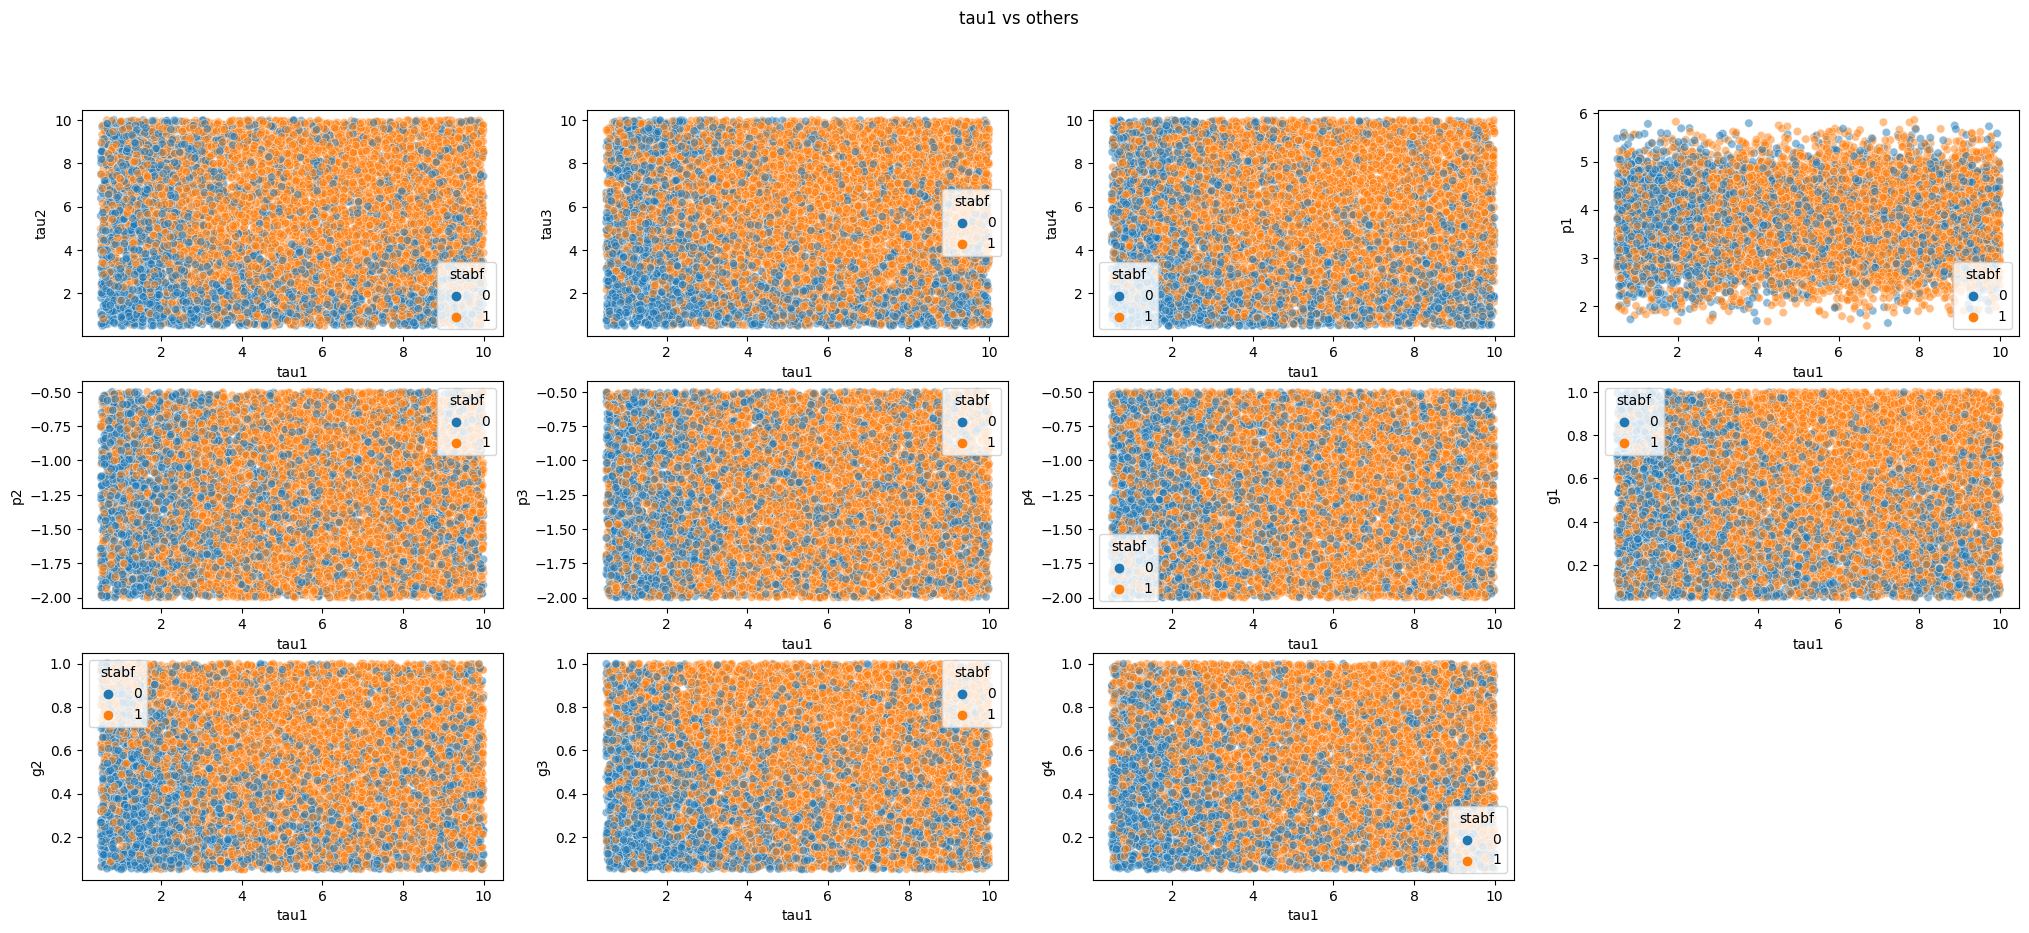

In [39]:
plt.figure(figsize=(25,10))

for i,j in enumerate(df.columns.to_list()[1:-1]):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=df['tau1'],y=df[j] ,hue=df['stabf'],alpha=0.5)

plt.suptitle("tau1 vs others")


plt.savefig('media/4 (preprocessing) (tau1 vs others)',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show() 

## Outlier Detection

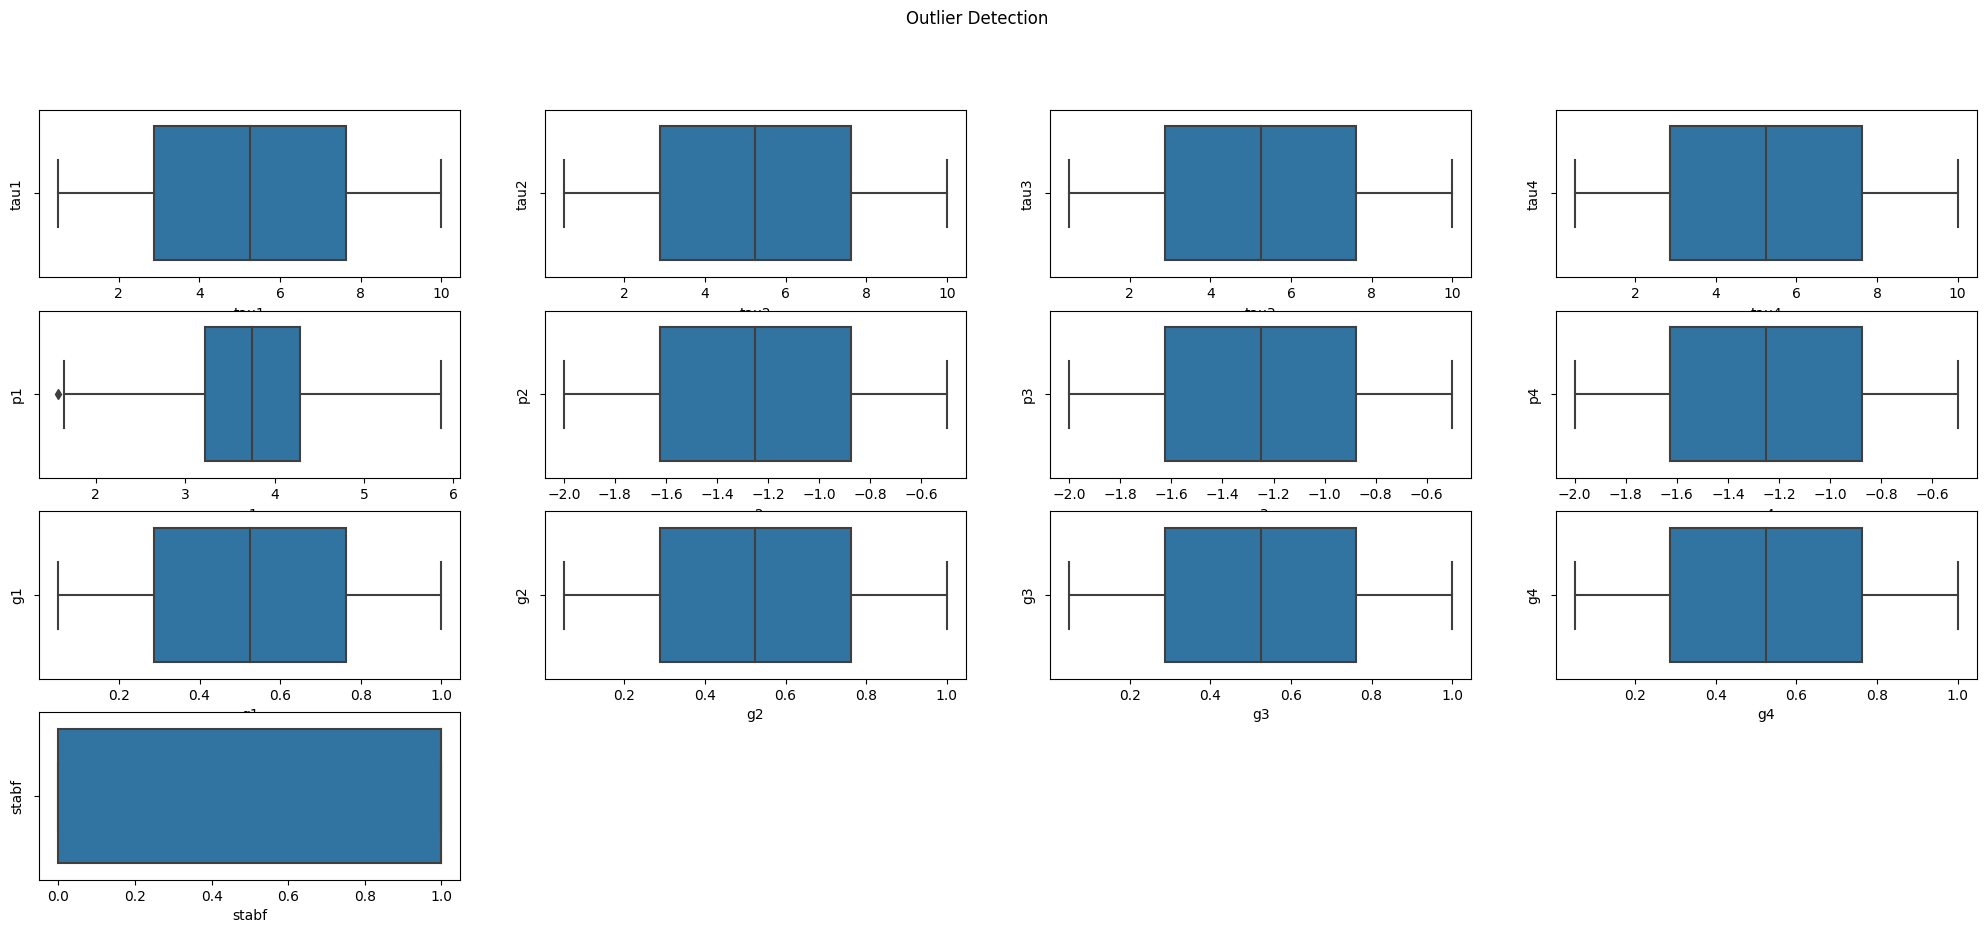

In [40]:

plt.figure(figsize=(25,10))

for i,j in enumerate(df.columns.to_list()):
    plt.subplot(4,4,i+1)
    sns.boxplot(x = df[j])
    plt.ylabel(f"{j}")

plt.suptitle("Outlier Detection")


plt.savefig('media/5 (preprocessing) (Outlier Detection).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show() 

In [41]:
y = df['stabf']
x = df.drop(['stabf'],axis=1)

## Feature Engineering

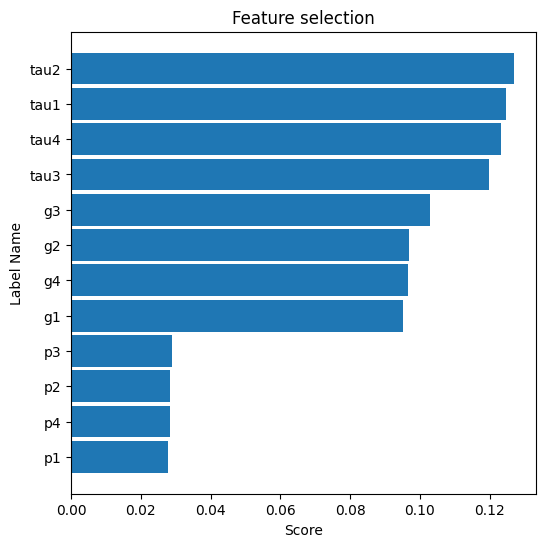

In [42]:
r_f = RandomForestClassifier(n_estimators=200)
fit = r_f.fit(x.to_numpy(), y.to_numpy())

plt.figure(figsize=(6, 6))

f_i = list(zip(df.columns,fit.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], height=0.9)

plt.title("Feature selection")
plt.ylabel("Label Name")
plt.xlabel("Score")

plt.savefig('media/6 (preprocessing) (Feature selection).png',
            bbox_inches ="tight",
            transparent = False
            ) 

plt.show()

## Train Test Split

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=32)

## Ensemble learning without Feature Engineering

In [44]:
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
x_g =   xgb.XGBClassifier()


voting_classifier = VotingClassifier(
    estimators=[('rf', rf_classifier), ('gb', gb_classifier),('xgb',x_g)],
    voting='soft'
)

In [45]:
# voting_classifier.fit(x_train,y_train)

# joblib.dump(voting_classifier, 'model/voting_classifier.job')

In [46]:
voting_classifier = joblib.load('model/voting_classifier.job')

In [47]:
y_pred_0 = voting_classifier.predict(x_test)

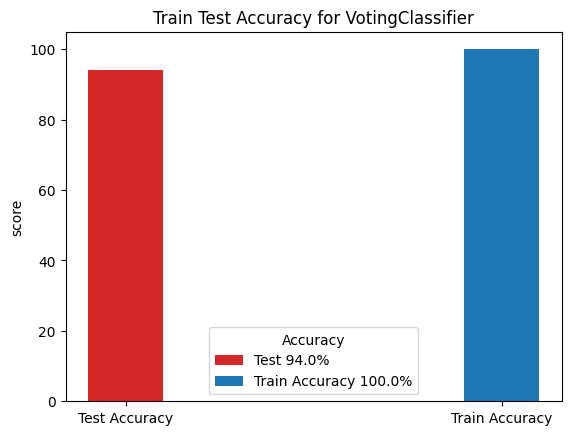

In [49]:
fig, ax = plt.subplots()
fruits = ['Test Accuracy', 'Train Accuracy']
counts = [voting_classifier.score(x_test,y_test)*100, accuracy_score(y_train, voting_classifier.predict(x_train))*100]
bar_labels = [f"Test {round(voting_classifier.score(x_test,y_test),2)*100}%", 
              f"Train Accuracy {round( accuracy_score(y_train, voting_classifier.predict(x_train)),2)*100}%"]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.2)

ax.set_title("Train Test Accuracy for VotingClassifier")
ax.legend(title='Accuracy')
plt.ylabel("score")
plt.savefig('media/7 (Model Ensemble learning without Feature Engineering) (Train Test Accuracy).png',
            bbox_inches ="tight",
            transparent = False
            ) 

plt.show()

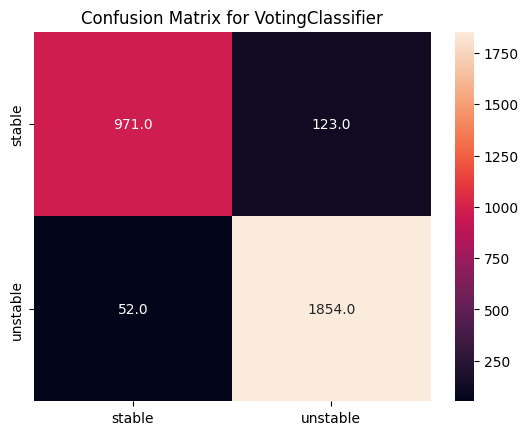

In [50]:
x_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]
y_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]

sns.heatmap(confusion_matrix(y_test, y_pred_0),annot=True,fmt=".1f",xticklabels=x_labels, yticklabels=y_labels)
plt.title("Confusion Matrix for VotingClassifier")
plt.savefig('media/8 (Model Ensemble learning without Feature Engineering) (Confusion Matrix).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()

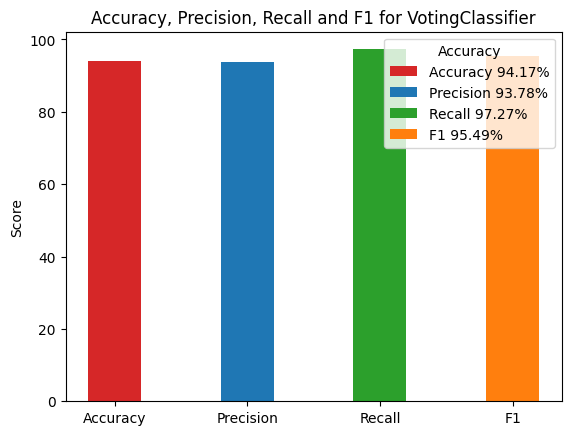

In [51]:
accuracy = accuracy_score(y_test, y_pred_0) * 100
precision = precision_score(y_test, y_pred_0)* 100
recall = recall_score(y_test, y_pred_0)* 100
f1 = f1_score(y_test, y_pred_0) * 100


fig, ax = plt.subplots()
fruits = ['Accuracy', 'Precision', 'Recall', 'F1']
counts = [accuracy, precision, recall, f1]
bar_labels = [f"Accuracy {round(accuracy,2)}%", f"Precision {round(precision,2)}%",
              f"Recall {round(recall,2)}%", f"F1 {round(f1,2)}%"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.4)

ax.set_title('Accuracy, Precision, Recall and F1 for VotingClassifier')
ax.legend(title='Accuracy')
plt.ylabel("Score")
plt.savefig('media/9 (Model Ensemble learning without Feature Engineering) (Accuracy, Precision, Recall, f1).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()

## Ensemble learning with Feature Engineering

In [52]:
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
x_g =   xgb.XGBClassifier()


# Create a Voting Classifier that combines the predictions of both classifiers
voting_classifier_with_f_e = VotingClassifier(
    estimators=[('rf', rf_classifier), ('gb', gb_classifier),('xgb',x_g)],
    voting='soft'
)

In [53]:
# voting_classifier_with_f_e.fit(x_train.drop(['p1', 'p2', 'p3', 'p4'],axis=1) ,y_train)

# joblib.dump(voting_classifier_with_f_e, 'model/voting_classifier_with_f_e.job')

In [54]:
voting_classifier_with_f_e = joblib.load('model/voting_classifier_with_f_e.job')

In [55]:
y_pred_1 = voting_classifier_with_f_e.predict(x_test.drop(['p1', 'p2', 'p3', 'p4'],axis=1))

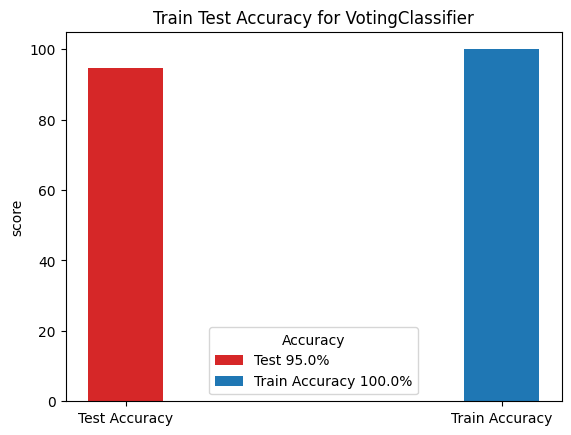

In [56]:
fig, ax = plt.subplots()
fruits = ['Test Accuracy', 'Train Accuracy']
counts = [voting_classifier_with_f_e.score(x_test.drop(['p1', 'p2', 'p3', 'p4'],axis=1),y_test)*100, 
          accuracy_score(y_train, voting_classifier_with_f_e.predict(x_train.drop(['p1', 'p2', 'p3', 'p4'],axis=1)))*100]

bar_labels = [f"Test {round(voting_classifier_with_f_e.score(x_test.drop(['p1', 'p2', 'p3', 'p4'],axis=1),y_test),2)*100}%", 
              f"Train Accuracy {round( accuracy_score(y_train, voting_classifier_with_f_e.predict(x_train.drop(['p1', 'p2', 'p3', 'p4'],axis=1))),2)*100}%"]

bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.2)

ax.set_title("Train Test Accuracy for VotingClassifier")
ax.legend(title='Accuracy')
plt.ylabel("score")
plt.savefig('media/10 (Model Ensemble learning with Feature Engineering) (Train Test).png',
            bbox_inches ="tight",
            transparent = False
            ) 

plt.show()

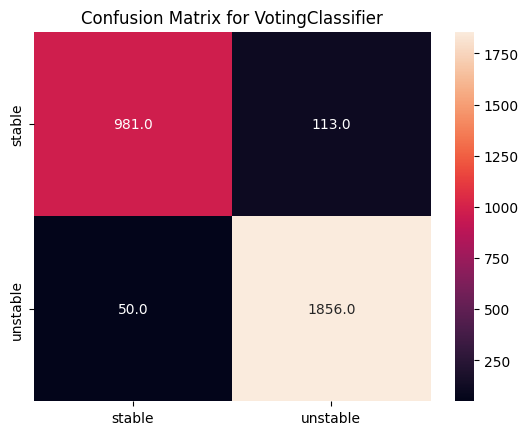

In [57]:
x_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]
y_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]

sns.heatmap(confusion_matrix(y_test, y_pred_1),annot=True,fmt=".1f",xticklabels=x_labels, yticklabels=y_labels)
plt.title("Confusion Matrix for VotingClassifier")
plt.savefig('media/11 (Model Ensemble learning with Feature Engineering) (Confusion Matrix).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()

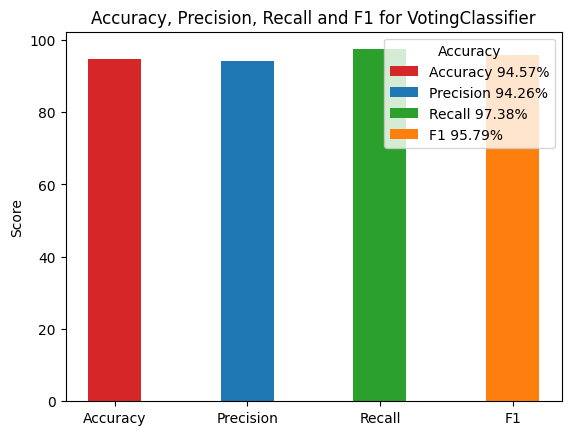

In [58]:
accuracy = accuracy_score(y_test, y_pred_1) * 100
precision = precision_score(y_test, y_pred_1)* 100
recall = recall_score(y_test, y_pred_1)* 100
f1 = f1_score(y_test, y_pred_1) * 100


fig, ax = plt.subplots()
fruits = ['Accuracy', 'Precision', 'Recall', 'F1']
counts = [accuracy, precision, recall, f1]
bar_labels = [f"Accuracy {round(accuracy,2)}%", f"Precision {round(precision,2)}%",
              f"Recall {round(recall,2)}%", f"F1 {round(f1,2)}%"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.4)

ax.set_title('Accuracy, Precision, Recall and F1 for VotingClassifier')
ax.legend(title='Accuracy')
plt.ylabel("Score")
plt.savefig('media/12 (Model Ensemble learning with Feature Engineering) (Accuracy, Precision, Recall, F1).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()

## GradientBoostingClassifier

In [59]:
gb_classifier = GradientBoostingClassifier()


# gb_classifier.fit(x_train,y_train)
# joblib.dump(gb_classifier, 'model/gb_classifier.job')

In [60]:
gb_classifier = joblib.load('model/gb_classifier.job')
y_pred_2 = gb_classifier.predict(x_test)

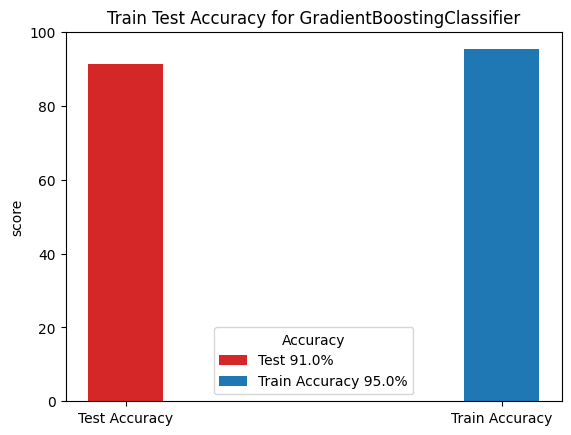

In [61]:
fig, ax = plt.subplots()
fruits = ['Test Accuracy', 'Train Accuracy']
counts = [gb_classifier.score(x_test,y_test)*100, accuracy_score(y_train, gb_classifier.predict(x_train))*100]
bar_labels = [f"Test {round(gb_classifier.score(x_test,y_test),2)*100}%", 
              f"Train Accuracy {round( accuracy_score(y_train, gb_classifier.predict(x_train)),2)*100}%"]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.2)

ax.set_title("Train Test Accuracy for GradientBoostingClassifier")
ax.legend(title='Accuracy')
plt.ylabel("score")
plt.savefig('media/13 (Model GradientBoostingClassifier) (Train Test Accuracy).png',
            bbox_inches ="tight",
            transparent = False
            ) 

plt.show()

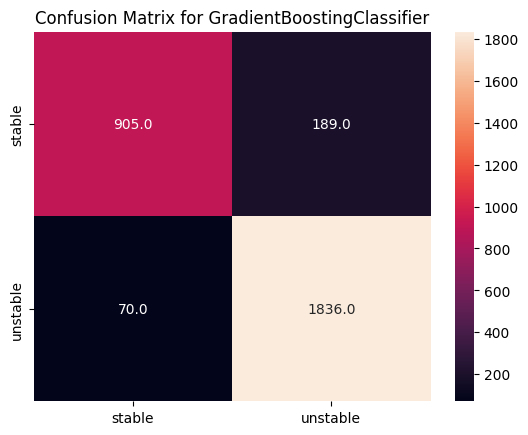

In [62]:
x_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]
y_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]

sns.heatmap(confusion_matrix(y_test, y_pred_2),annot=True,fmt=".1f",xticklabels=x_labels, yticklabels=y_labels)
plt.title("Confusion Matrix for GradientBoostingClassifier")
plt.savefig('media/14 (Model GradientBoostingClassifier) (Confusion Matrix).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()

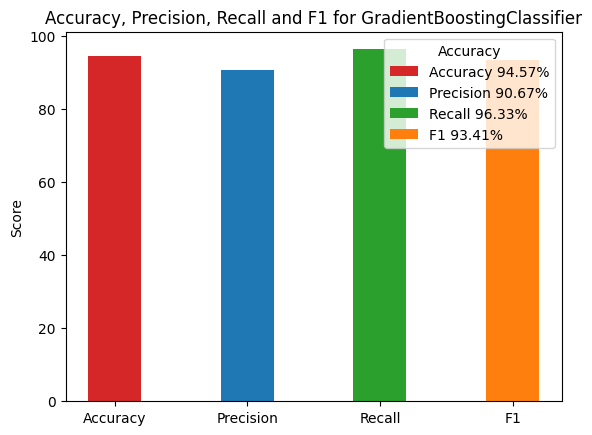

In [63]:
precision = precision_score(y_test, y_pred_2)* 100
recall = recall_score(y_test, y_pred_2)* 100
f1 = f1_score(y_test, y_pred_2) * 100


fig, ax = plt.subplots()
fruits = ['Accuracy', 'Precision', 'Recall', 'F1']
counts = [accuracy, precision, recall, f1]
bar_labels = [f"Accuracy {round(accuracy,2)}%", f"Precision {round(precision,2)}%",
              f"Recall {round(recall,2)}%", f"F1 {round(f1,2)}%"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.4)

ax.set_title('Accuracy, Precision, Recall and F1 for GradientBoostingClassifier')
ax.legend(title='Accuracy')
plt.ylabel("Score")
plt.savefig('media/15 (Model GradientBoostingClassifier) (Accuracy, Precision, Recall, F1).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()

## RandomForestClassifier

In [64]:
rf_classifier = RandomForestClassifier()

In [65]:
# rf_classifier.fit(x_train,y_train)

# joblib.dump(rf_classifier, 'model/rf_classifier.job')

In [66]:
rf_classifier = joblib.load("model/rf_classifier.job")
y_pred_3 = rf_classifier.predict(x_test)

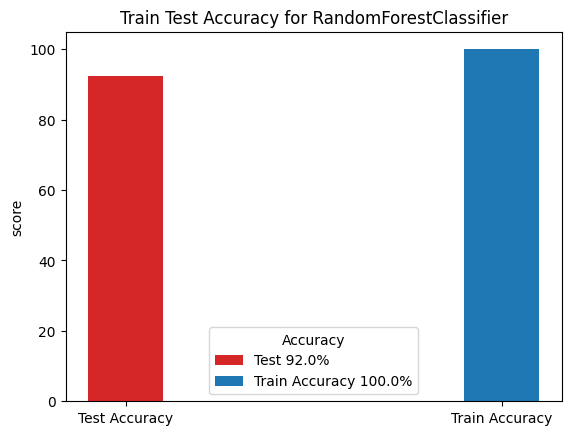

In [67]:
fig, ax = plt.subplots()
fruits = ['Test Accuracy', 'Train Accuracy']
counts = [rf_classifier.score(x_test,y_test)*100, accuracy_score(y_train, rf_classifier.predict(x_train))*100]
bar_labels = [f"Test {round(rf_classifier.score(x_test,y_test),2)*100}%", 
              f"Train Accuracy {round( accuracy_score(y_train, rf_classifier.predict(x_train)),2)*100}%"]
bar_colors = ['tab:red', 'tab:blue']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.2)

ax.set_title("Train Test Accuracy for RandomForestClassifier")
ax.legend(title='Accuracy')
plt.ylabel("score")
plt.savefig('media/16 (Model RandomForestClassifier) (Train Test).png',
            bbox_inches ="tight",
            transparent = False
            ) 

plt.show()

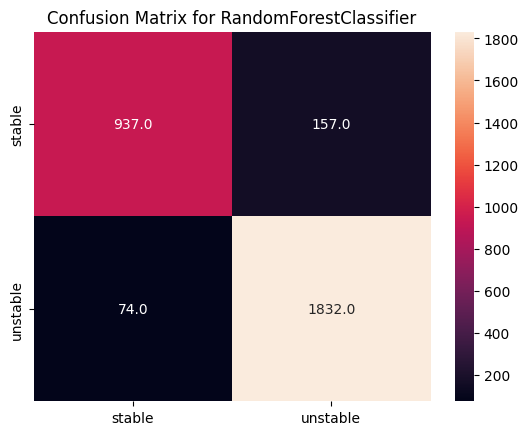

In [68]:
x_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]
y_labels = [l_e.inverse_transform([0])[0], l_e.inverse_transform([1])[0]]

sns.heatmap(confusion_matrix(y_test, y_pred_3),annot=True,fmt=".1f",xticklabels=x_labels, yticklabels=y_labels)
plt.title("Confusion Matrix for RandomForestClassifier")
plt.savefig('media/17 (Model RandomForestClassifier) (Confusion Matrix).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()

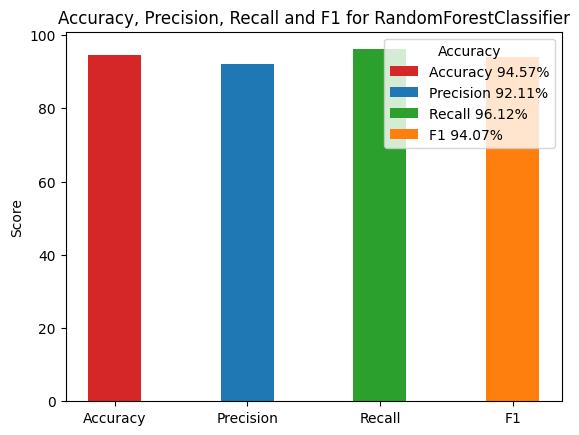

In [69]:
precision = precision_score(y_test, y_pred_3)* 100
recall = recall_score(y_test, y_pred_3)* 100
f1 = f1_score(y_test, y_pred_3) * 100


fig, ax = plt.subplots()
fruits = ['Accuracy', 'Precision', 'Recall', 'F1']
counts = [accuracy, precision, recall, f1]
bar_labels = [f"Accuracy {round(accuracy,2)}%", f"Precision {round(precision,2)}%",
              f"Recall {round(recall,2)}%", f"F1 {round(f1,2)}%"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.4)

ax.set_title('Accuracy, Precision, Recall and F1 for RandomForestClassifier')
ax.legend(title='Accuracy')
plt.ylabel("Score")
plt.savefig('media/18 (Model RandomForestClassifier) (Accuracy, Precision, Recall, F1).png',
            bbox_inches ="tight",
            transparent = False
            ) 
plt.show()